***
# <center>**Loan Data Analysis using different ML models**</center>
#### -Shrey Aggarwal 
#### September 8, 2021
***
I am going to classify users as those who clicked on an advertisement and those who didn't. I will use 4 different supervised binary classifiaction models of machine learning to find the best one for this data set.

Models Used Here:
1. Logistic Regression (LR)
2. Decission Tree (DT) + Random Forest (RF)
3. Support Vector Machines (SVM)
4. K Nearest Neighbors (KNN)

### Import Libraries

In [1]:
# Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# ML Models
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Machine Learning
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import classification_report,confusion_matrix, f1_score

### Data Description

source: https://www.kaggle.com/fayomi/advertising
Contains information about Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic, City, Gender, Country, Timestamp, Clicked on ad or not. 1000 rows X 10 columns

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Columns Ad Topic Line, City, Country, and Timestamp are objects. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Data Cleaning

In [5]:
print('Number of Unique Ad Topic Lines= ', len(df['Ad Topic Line'].unique()))
print('Number of Unique Cities= ', len(df['City'].unique()))
print('Number of Unique Countries= ', len(df['Country'].unique()))

Number of Unique Ad Topic Lines=  1000
Number of Unique Cities=  969
Number of Unique Countries=  237


Ad Topic Line, City, and Country columns have several unique values. These values would not help in classification, so I dropeed them

In [6]:
df.drop('Ad Topic Line', axis = 1, inplace = True)
df.drop('City', axis = 1, inplace = True)
df.drop('Country', axis = 1, inplace = True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


Time stamp has same same year for all entries, so I didn't use it. Potentially usefull information is month, day of the week, and time of click (hourly).

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
year = df['Timestamp'].apply(lambda x: x.year)
year.unique()

array([2016], dtype=int64)

In [8]:
month = df['Timestamp'].apply(lambda x: x.month)
month.unique()

array([3, 4, 1, 6, 5, 7, 2], dtype=int64)

In [9]:
hour = df['Timestamp'].apply(lambda x: x.hour)
DOW = df['Timestamp'].apply(lambda x: x.dayofweek)

month = {'month': month}
month = pd.DataFrame(month)

hour = {'hour': hour}
hour = pd.DataFrame(hour)

DOW = {'Day of Week': DOW}
DOW = pd.DataFrame(DOW)



In [10]:
df = pd.concat([df, month, hour, DOW], axis = 1)
df.drop('Timestamp', axis = 1, inplace = True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,month,hour,Day of Week
0,68.95,35,61833.90,256.09,0,0,3,0,6
1,80.23,31,68441.85,193.77,1,0,4,1,0
2,69.47,26,59785.94,236.50,0,0,3,20,6
3,74.15,29,54806.18,245.89,1,0,1,2,6
4,68.37,35,73889.99,225.58,0,0,6,3,4


Daily Time Spent on Site, Age, Area Income, and Daily Internet Usage seem to have a significant dependence on Ad Clicks, compared to sex, month, day of week, and hour.

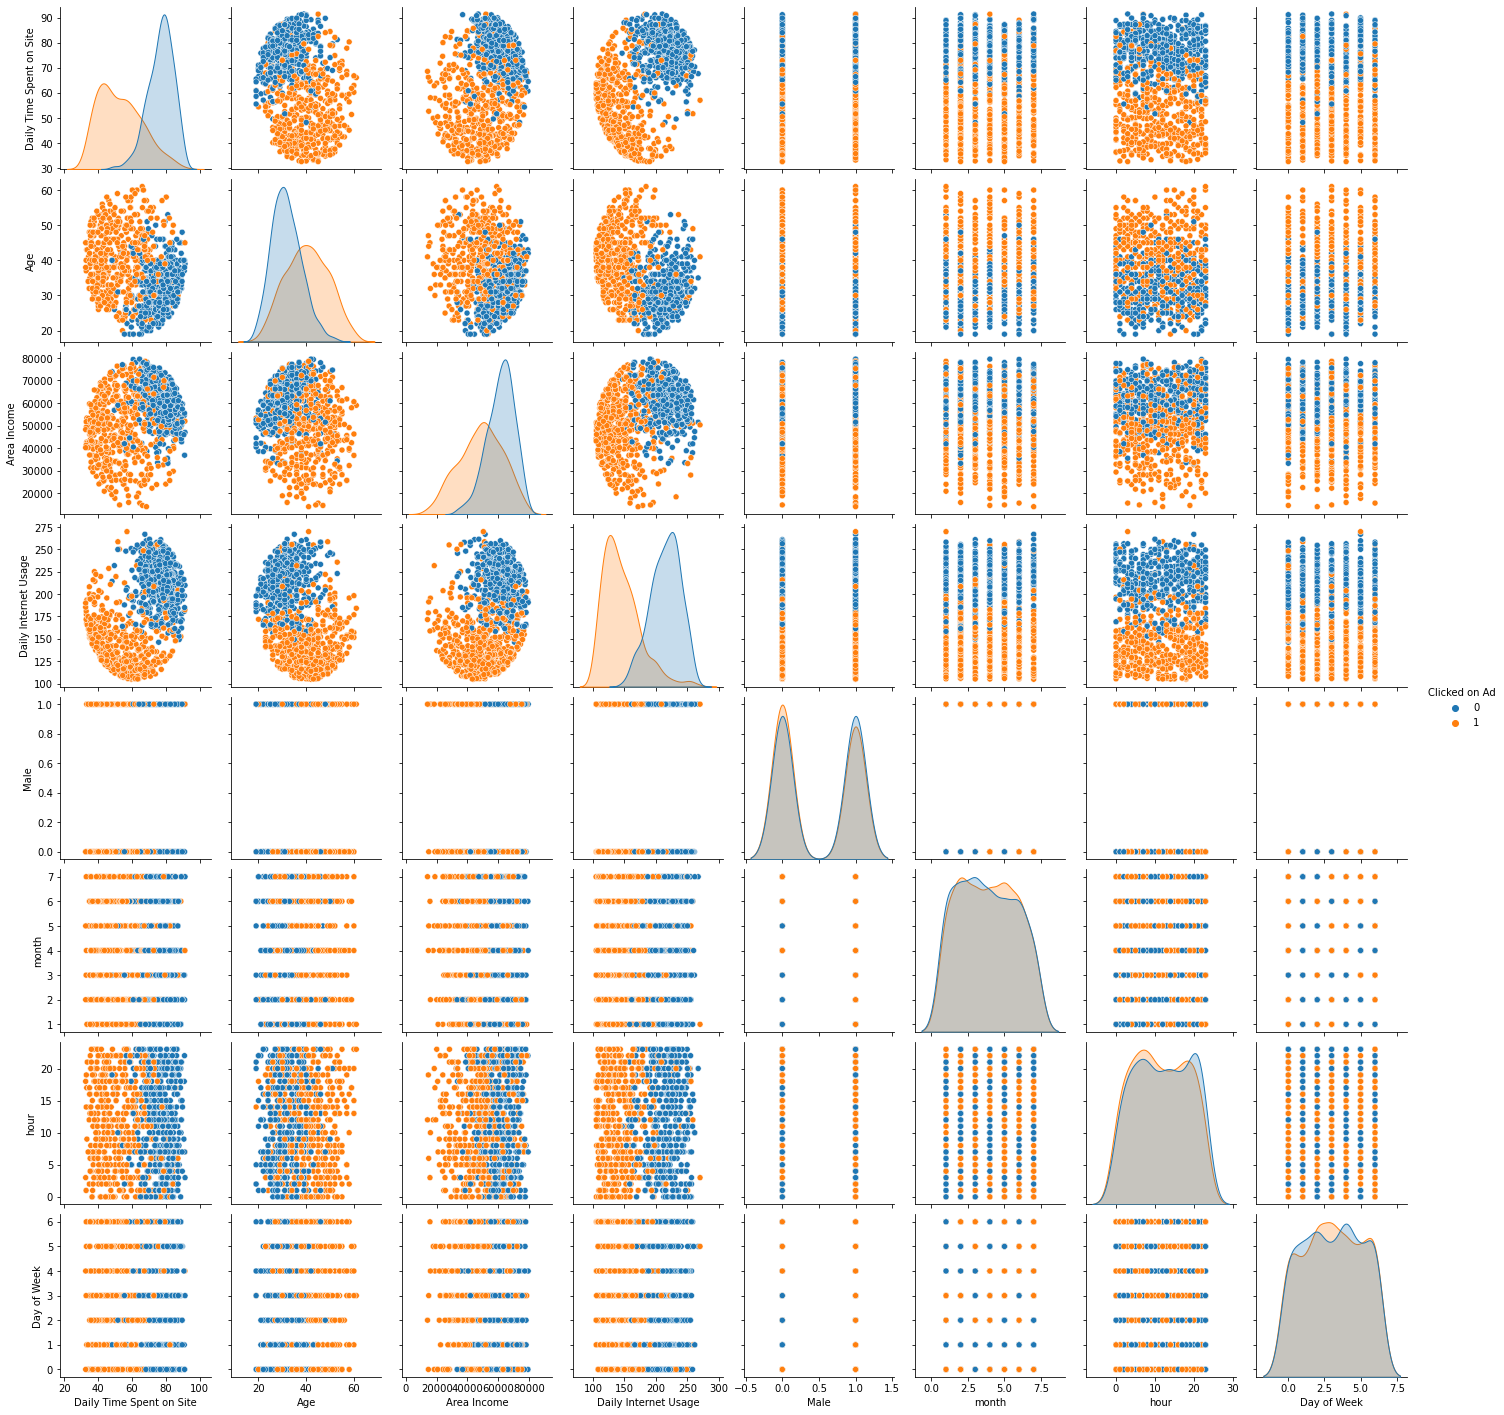

In [11]:
sns.pairplot(df, hue = 'Clicked on Ad')

The heat map below shows correlation among columns. sex, month, day of Week, and hour are not correlated to other columns.

<AxesSubplot:>

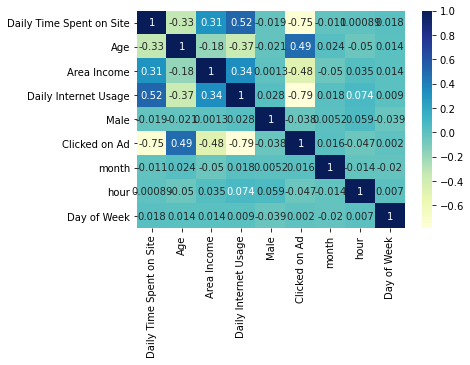

In [12]:
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

Since sex, month, day of Week, and hour don't have correlations with other columns, and Ad clicks had low dependence on them, I am not using them for the ML models

In [13]:
df.drop('Male', axis = 1, inplace = True)
df.drop('month', axis = 1, inplace = True)
df.drop('Day of Week', axis = 1, inplace = True)
df.drop('hour', axis = 1, inplace = True)

All Colums are integer or float values. They are in usable format for ML models

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


## Train Test Split

Train test split has 700 training and 300 testing data points

In [15]:
X = df.drop('Clicked on Ad', axis = 1)
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 7) #use same random state to replicate results


## MODEL 1: LOGISTIC REGRESSION

In [16]:
lr = LogisticRegression() # model
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
Lr_pred = lr.predict(X_test) # predictions to be compared to y_test

In [18]:
Lr_conf = confusion_matrix(y_test,Lr_pred) # stores confusion matrix for comparison

In [19]:
Lr_f1 = f1_score(y_test,Lr_pred, average = 'weighted') # f1 score

In [20]:
print(classification_report(y_test,Lr_pred)) # classification report

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       146
           1       0.98      0.97      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



## MODEL 2: Decission Tree + Random Forest

In [21]:
dt = DecisionTreeClassifier() # model for Decsission Tree
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
Dt_pred = dt.predict(X_test) # predictions for Decission Tree

In [23]:
Dt_conf = confusion_matrix(y_test,Dt_pred) # confusion matric for Decission Tree

In [24]:
Dt_f1 = f1_score(y_test,Dt_pred, average = 'weighted') # f1 score for Decission Tree

In [25]:
print(classification_report(y_test,Dt_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       146
           1       0.94      0.96      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [26]:
rf = RandomForestClassifier(n_estimators=300) # model for Random Forest Classifier
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [27]:
Rf_pred = rf.predict(X_test)  # Predictions for Random Forest

In [28]:
Rf_conf = confusion_matrix(y_test,Rf_pred)

In [29]:
Rf_f1 = f1_score(y_test,Rf_pred, average = 'weighted')

In [30]:
print(classification_report(y_test,Rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       146
           1       0.97      0.98      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



## MODEL 3: SVM

In [31]:
svm_model = SVC() # model
svm_model.fit(X_train,y_train)

SVC()

In [32]:
SVM_pred = svm_model.predict(X_test) # initail predictions for SVC

In [33]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} #model paramter optimization
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)
grid_pred = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [34]:
SVM_conf = confusion_matrix(y_test,grid_pred)

In [35]:
SVM_f1 = f1_score(y_test, grid_pred, average='weighted')

In [36]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       146
           1       0.86      0.81      0.83       154

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## MODEL 4: KNN

In [37]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 7)

I determined k by iterating it from 1 - 40, and comparing accuracy (number of right and wrong predictions) on a scale of 0-1 for each k.

In [39]:
accuracy_k = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_k.append(np.mean(pred_i == y_test))

k = 5,6, and 7 had highest accuracies. I choose k = 5 for this classifier

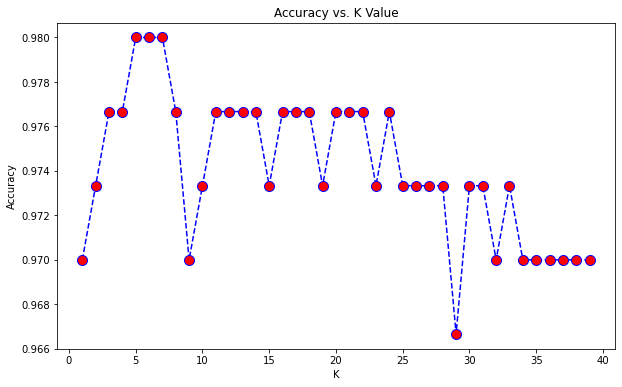

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_k,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [41]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
KNN_pred = knn.predict(X_test)

In [43]:
KNN_conf = confusion_matrix(y_test,KNN_pred)

In [44]:
KNN_f1 = f1_score(y_test,KNN_pred, average = 'weighted')

In [45]:
print(classification_report(y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       146
           1       0.99      0.97      0.98       154

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



## Model Comparison

From the confusion matrices in the heat maps, K Nearest Neighbors has the most correct predictions.

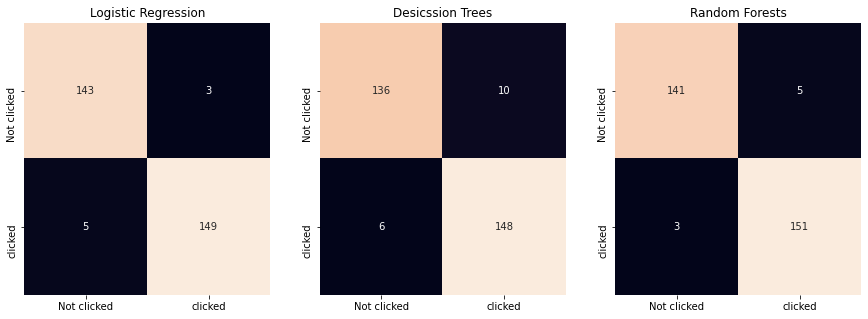

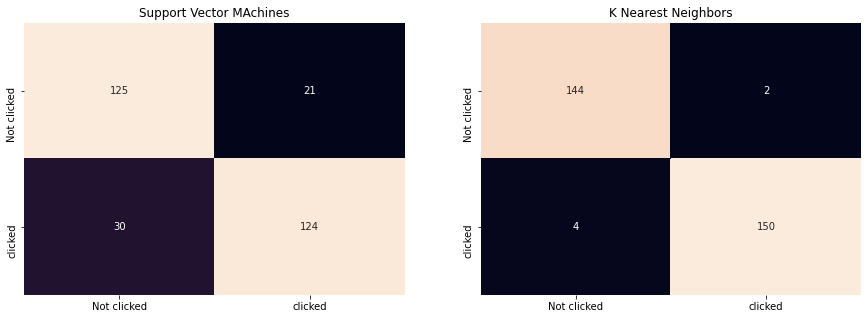

In [46]:
labels = ['Not clicked', 'clicked']
Lr = pd.DataFrame(Lr_conf, index = labels, columns = labels)
Dt = pd.DataFrame(Dt_conf, index = labels, columns = labels)
Rf = pd.DataFrame(Rf_conf, index = labels, columns = labels)
SVM = pd.DataFrame(SVM_conf, index = labels, columns = labels)
KNN = pd.DataFrame(KNN_conf, index = labels, columns = labels)
              
plt.rcParams['figure.figsize'] = [15, 5]  # just anpther way to set fig size that works with heatmaps better

fig, ax =plt.subplots(1,3)
sns.heatmap(Lr, annot = True, fmt='g', cbar = False, ax = ax[0])
ax[0].set_title('Logistic Regression')

sns.heatmap(Dt, annot = True, fmt='g', cbar = False, ax = ax[1])
ax[1].set_title('Desicssion Trees')

sns.heatmap(Rf, annot = True, fmt='g', cbar = False, ax = ax[2])
ax[2].set_title('Random Forests')
plt.show()

fig, ax =plt.subplots(1,2)
sns.heatmap(SVM, annot = True, fmt='g', cbar = False, ax = ax[0])
ax[0].set_title('Support Vector MAchines')

sns.heatmap(KNN, annot = True, fmt='g', cbar = False, ax = ax[1])
ax[1].set_title('K Nearest Neighbors')
plt.show()

K Nearest Neighbors also has the highest f1 score of 0.98/1.

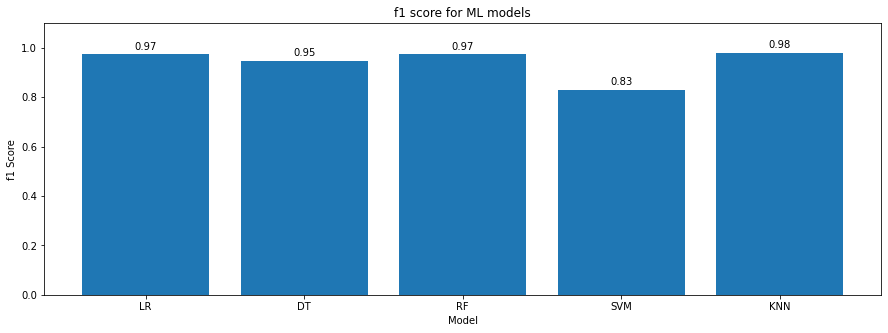

In [47]:
models = ['LR', 'DT', 'RF', 'SVM', 'KNN']
scores = [Lr_f1, Dt_f1, Rf_f1, SVM_f1, KNN_f1]

plt.bar(models,scores)
for i in range(5):
    plt.text(models[i], scores[i]+0.02, "{:.2f}".format(scores[i]), ha = 'center')
plt.xlabel('Model')
plt.ylabel('f1 Score')
plt.title('f1 score for ML models')
plt.ylim([0,1.1])
plt.show()

## Conclusion
K Nearest Neighbors is a decent classification model for the loan data used here. Daily Time Spent on Site, Age, Area Income, and Daily Internet Usage information is used here for the classification. k = 5 parameter for K Nearest Neighbors, and 70%-30% train-test split gave an f1 score of 0.98/1. This was the highest score among all the models compared. The KNN model also had the least amount of wrong predictions in confusion matrix.